<a href="https://colab.research.google.com/github/Ktejaswi45/Potato_leaf_Disease_AICTE/blob/main/Potato_leaf_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/


'Colab Notebooks'	        Reels-20241208T141941Z-001
'data analyst roadmap.gsheet'  'Salaar_ceasefire 🔥-20241208T140945Z-001'
 Potato			        TM-VM-20241208T173855Z-001


In [5]:
!ls /content/drive/MyDrive/Potato


Test  Train  Valid


In [7]:
!ls /content/drive/MyDrive
!ls /content/drive/MyDrive/Potato
!ls /content/drive/MyDrive/Potato/Train
!ls /content/drive/MyDrive/Potato/Test
!ls /content/drive/MyDrive/Potato/Valid


'Colab Notebooks'	        Reels-20241208T141941Z-001
'data analyst roadmap.gsheet'  'Salaar_ceasefire 🔥-20241208T140945Z-001'
 Potato			        TM-VM-20241208T173855Z-001
Test  Train  Valid
Potato___Early_blight  Potato___healthy  Potato___Late_blight
Potato___Early_blight  Potato___healthy  Potato___Late_blight
Potato___Early_blight  Potato___healthy  Potato___Late_blight


In [9]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

base_path = '/content/drive/MyDrive/Potato'
train_dir = os.path.join(base_path, 'Train')
test_dir = os.path.join(base_path, 'Test')
valid_dir = os.path.join(base_path, 'Valid')

print(f"Train directory: {train_dir}")
print(f"Test directory: {test_dir}")
print(f"Valid directory: {valid_dir}")


Mounted at /content/drive
Train directory: /content/drive/MyDrive/Potato/Train
Test directory: /content/drive/MyDrive/Potato/Test
Valid directory: /content/drive/MyDrive/Potato/Valid


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


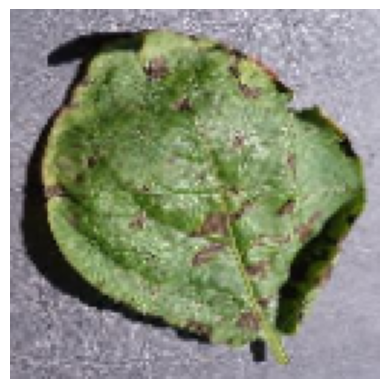

In [10]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset paths
train_dir = "/content/drive/MyDrive/Potato/Train"
test_dir = "/content/drive/MyDrive/Potato/Test"
valid_dir = "/content/drive/MyDrive/Potato/Valid"

# Ensure the directories exist
if not os.path.exists(train_dir) or not os.path.exists(test_dir) or not os.path.exists(valid_dir):
    raise FileNotFoundError("One or more directories not found. Please check the directory structure.")

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)

# Loading train, test, and validation data
train_data = datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
valid_data = datagen.flow_from_directory(valid_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

# Display a sample image from the training data
sample, label = next(train_data)
plt.imshow(sample[0])  # Display first image
plt.axis("off")  # Hide axis
plt.show()


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Healthy, Early Blight, Late Blight
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(train_data, valid_data=valid_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 354s 12s/step - accuracy: 0.3730 - loss: 1.0955 - val_accuracy: 0.6267 - val_loss: 0.7479
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6674 - loss: 0.7516 - val_accuracy: 0.7700 - val_loss: 0.5580
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7917 - loss: 0.4973 - val_accuracy: 0.8833 - val_loss: 0.3121
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8417 - loss: 0.3869 - val_accuracy: 0.8933 - val_loss: 0.2388
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9002 - loss: 0.2781 - val_accuracy: 0.9367 - val_loss: 0.1863
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9041 - loss: 0.2425 - val_accuracy: 0.9267 - val_loss: 0.1711
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9392 - loss: 0.1793 - val_accuracy: 0.8900 - val_loss: 0.2756
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9089 - loss: 0.2218 - val_accuracy: 0.9167 - val_los

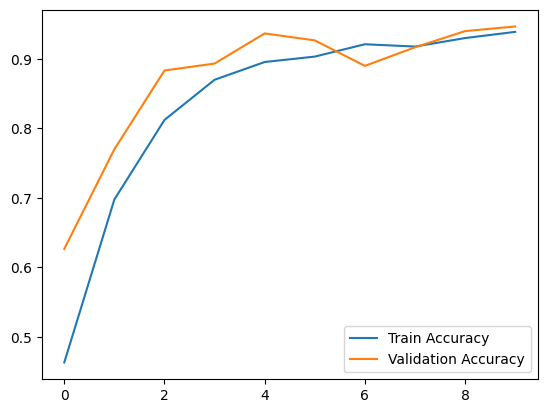

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Train data: 900 images
Validation data: 300 images
Test data: 300 images


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3918 - loss: 1.2069 - val_accuracy: 0.8200 - val_loss: 0.6447
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7572 - loss: 0.5666 - val_accuracy: 0.8667 - val_loss: 0.3689
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8464 - loss: 0.3959 - val_accuracy: 0.9200 - val_loss: 0.2628
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8351 - loss: 0.3937 - val_accuracy: 0.7867 - val_loss: 0.4732
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7979 - loss: 0.4209 - val_accuracy: 0.8900 - val_loss: 0.2464
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8886 - loss: 0.2891 - val_accuracy: 0.8400 - val_loss: 0.4098
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8767 - loss: 0.3044 - val_accuracy: 0.8800 - val_loss: 0.3525
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8679 - loss: 0.3948 - val_accuracy: 0.8733 - val_loss:

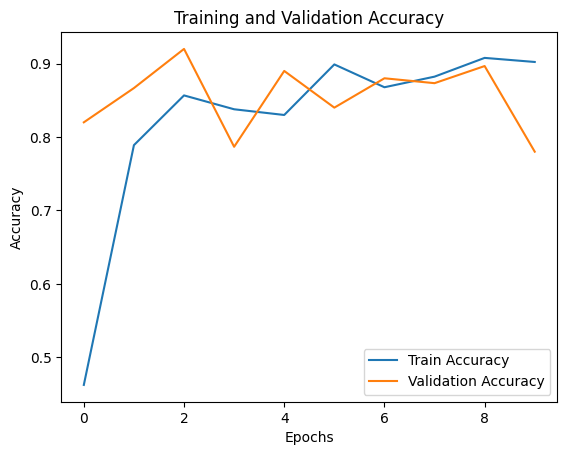

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths (make sure these paths are correct based on your directory structure)
train_dir = "/content/drive/MyDrive/Potato/Train"
test_dir = "/content/drive/MyDrive/Potato/Test"
valid_dir = "/content/drive/MyDrive/Potato/Valid"

# Verify the existence of directories
if not os.path.exists(train_dir) or not os.path.exists(test_dir) or not os.path.exists(valid_dir):
    raise FileNotFoundError("One or more directories not found. Please check the directory structure.")

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)

# Loading train, test, and validation data
train_data = datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
valid_data = datagen.flow_from_directory(valid_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

# Verify if data is loaded properly
print(f"Train data: {train_data.samples} images")
print(f"Validation data: {valid_data.samples} images")
print(f"Test data: {test_data.samples} images")

# Build the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Healthy, Early Blight, Late Blight
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_data, validation_data=valid_data, epochs=10)

# Plot accuracy and validation accuracy after training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.plot(acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training and Validation Accuracy')  # Title
plt.legend()
plt.show()


In [15]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 9s/step - accuracy: 0.7758 - loss: 0.6385
Test Accuracy: 76.67%
Test Loss: 0.6454


In [16]:
model.save('/content/drive/MyDrive/Potato/potato_disease_model.h5')


In [25]:
import cv2
import numpy as np
import os
from google.colab import files
from tensorflow.keras.models import load_model

# Load the trained model (ensure the model file path is correct)
model_path = '/content/drive/MyDrive/models/model.h5'
if not os.path.exists(model_path):
    print(f"Error: Model file not found at {model_path}")
else:
    model = load_model(model_path)
    print("Model loaded successfully.")

# Function to upload and predict an image
def upload_and_predict():
    uploaded = files.upload()  # Allow user to upload an image

    for filename in uploaded.keys():
        image_path = filename  # Get the uploaded file name

        # Load and preprocess the image
        img = cv2.imread(image_path)
        if img is None:
            print("Error: Failed to load image. Check the file format.")
            return

        img = cv2.resize(img, (128, 128))  # Resize to match model input size
        img = img / 255.0  # Normalize
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Make prediction
        prediction = model.predict(img)
        class_idx = np.argmax(prediction, axis=1)[0]  # Get predicted class

        # Assuming train_data is already loaded and contains class indices
        class_labels = train_data.class_indices
        class_labels = {v: k for k, v in class_labels.items()}  # Reverse dictionary

        print(f"Predicted Class: {class_labels.get(class_idx, 'Unknown')}")

# Run the upload and prediction function
upload_and_predict()


Error: Model file not found at /content/drive/MyDrive/models/model.h5


Saving 8994b76b-6e1e-42d3-b07c-99abca3fa35b___RS_Early.B 7762.JPG to 8994b76b-6e1e-42d3-b07c-99abca3fa35b___RS_Early.B 7762.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Class: Potato___Early_blight
